In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from plotnine import *
from wordcloud import STOPWORDS,WordCloud
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [13]:
from sklearn.metrics import r2_score

In [26]:
df_tweets = pd.read_csv('./dataset.csv')

In [27]:
df_tweets = df_tweets.fillna(0)
#df_tweets = df_tweets.loc[(df_tweets['Retweets']>20) | (df_tweets['Replys']>10) | (df_tweets['Likes']>3) ]
df_tweets

,Username,Handle,Timestamp,Text,Replys,Retweets,Likes
0,Thabata Campos Belli com 3 doses no braço,@ThabataBelli,2021-12-04T06:20:16.000Z,"Não, imagina, jamais seria #MamataFrias,não é ...",0.0,0.0,0.0
1,Tonni D. Sanctus,@BadgerWolverine,2021-11-28T03:47:26.000Z,"Não existe mulher feia, o que existe são mulhe...",0.0,0.0,1.0
2,Emanuele Kent,@emanuelekent,2021-11-22T01:46:14.000Z,A revolta do SIKERA essa semana sobre a lei #R...,0.0,0.0,3.0
3,Pleno.News,@PlenoNews,2021-11-13T12:39:39.000Z,Portaria do governo que proíbe linguagem neutr...,3.0,9.0,23.0
4,Pleno.News,@PlenoNews,2021-11-10T15:01:20.000Z,Daniela Lima zomba de medida de Mario Frias pa...,3.0,4.0,13.0
...,...,...,...,...,...,...,...
1582,Secretaria Especial da Cultura,@CulturaGovBr,2009-04-02T23:56:27.000Z,"Agora, no debate da Folha, vem Sarkovas, o úni...",0.0,0.0,0.0
1583,Erika Campana “OTO PA-TA-MAR”,@lilicacampana,2009-04-02T23:55:02.000Z,RT \n@CulturaGovBr\n #rouanet entra no próximo...,0.0,0.0,0.0
1584,Secretaria Especial da Cultura,@CulturaGovBr,2009-04-02T23:54:09.000Z,#rouanet entra no próximo bloco do Jornal Naci...,0.0,0.0,0.0
1585,Secretaria Especial da Cultura,@CulturaGovBr,2009-04-02T23:51:06.000Z,Pélico diz que não viu nenhuma novidade na nov...,0.0,0.0,0.0


In [5]:
import statistics

In [28]:
ids = dict()
semrepeticoes = pd.DataFrame()
for i in range(len(df_tweets.index)):
    try:
        ids[df_tweets.iloc[i, 5]].append(df_tweets.iloc[i, 6])
    except:
        ids[df_tweets.iloc[i, 5]] = []
        ids[df_tweets.iloc[i, 5]].append(df_tweets.iloc[i, 6])


In [ ]:
semrepeticoes = pd.DataFrame()
for i in ids:
    temp = pd.DataFrame({'Replys': [i],
                        'Retweets': [statistics.mean(ids[i])]
                         })
    semrepeticoes = semrepeticoes.append(temp)

    

In [61]:
semrepeticoes

,Replys,Retweets
0,0.0,0.216401
0,9.0,11.500000
0,4.0,5.800000
0,3.0,4.440000
0,1.0,1.083916
0,2.0,2.717391
0,18.0,48.000000
0,7.0,3.250000
0,39.0,95.333333
0,5.0,4.363636


In [67]:
x = semrepeticoes[['Replys']]
y = semrepeticoes['Retweets']


In [68]:
modelskl = LinearRegression()

In [70]:
modelskl.fit(x.values,y)

LinearRegression()

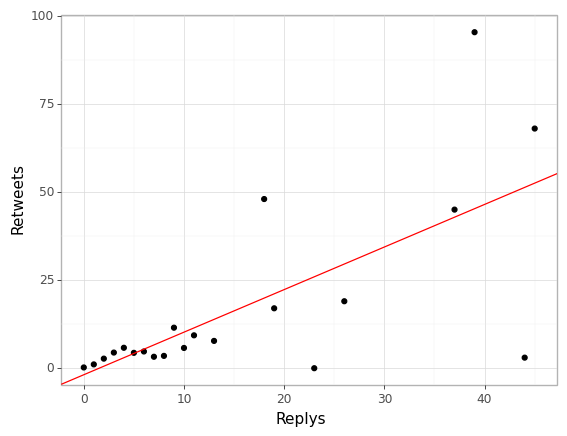

<ggplot: (136158247412)>

In [72]:
(ggplot(semrepeticoes,aes('Replys','Retweets'))
+ geom_point()
+ theme_light()
+ geom_abline(intercept=modelskl.intercept_ , slope=modelskl.coef_[0], color='red')
)

In [75]:
modelskl.predict([[0]])[0]

-1.8520515994398394

In [80]:
true_value = []
predict_value = []

for i in range(len(semrepeticoes.index)):
    row = semrepeticoes.iloc[i]
    true_value.append(row['Retweets'])
    predict_value.append(modelskl.predict([[row['Replys']]])[0])

r2_score(true_value, predict_value)

0.475861888243301